In [154]:
#Importing needed modules.

from pandas import read_csv , DataFrame
from matplotlib.pyplot import pie , title , show , figure , plot , xlabel , ylabel , legend
from numpy import where
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers , models
from tensorflow.keras.optimizers import Adam

#Instancing of Tokenizer and Translator objects.

tokenizer = Tokenizer(oov_token='<00U00>')

In [155]:
#Loading data.

file = read_csv("Twitter_Full.csv",delimiter=';')
df = file.copy()
df.sample(10)

,text,hashtags,labels,Unnamed: 3,Unnamed: 4
5953,Looking forward to the World Hearing Voices Co...,['WHVC2021'],1,NaN,NaN
1931,Medscape Leveling the playing field in MentalH...,"['MentalHealth', 'HealthEquity']",0,NaN,NaN
4820,Get my art printed on awesome products. Suppor...,"['RBandME', 'findyourthing', 'redbubble', 'tir...",1,NaN,NaN
8206,None stop work! Who ever said it gets easier.....,"['work', 'keyworker', 'tired', '24hourshift']",1,NaN,NaN
2111,"You've always been too nice to me, but I think...","['stress', 'mentalhealth', 'pension', 'ADHD', ...",1,NaN,NaN
1141,This is a testimonial from one of our SilverCl...,[],1,NaN,NaN
7845,The amazing Roseanne Dobkin shares some tips f...,"['parkinsonsdisease', 'wellness']",0,NaN,NaN
1154,"No Parents, No family, No Friends, No Man, No ...","['Lonely', 'Anxiety', 'PanicAttacks', 'Stressed']",1,NaN,NaN
4007,The politicians enforcing Melbourne’s lockdown...,"['lockdown', 'SamanthaRatnam']",1,NaN,NaN
3431,How to prioritise yourself and work at the sam...,"['work', 'workplace', 'selfcare', 'wellbeing',...",1,NaN,NaN


In [156]:
df = df[['text','hashtags','labels']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      8897 non-null   object
 1   hashtags  8892 non-null   object
 2   labels    8900 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 208.7+ KB


In [157]:
df.isnull().sum()

text        3
hashtags    8
labels      0
dtype: int64

In [158]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8889 entries, 0 to 8899
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      8889 non-null   object
 1   hashtags  8889 non-null   object
 2   labels    8889 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 277.8+ KB


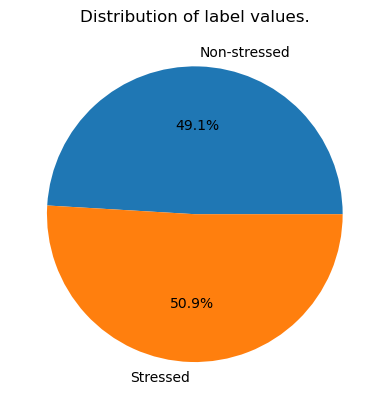

In [159]:
pie([df.labels.to_list().count(i) for i in list(set(df.labels.to_list()))],
    labels=['Non-stressed','Stressed'],
    autopct='%1.1f%%')
title('Distribution of label values.')
show()

In [160]:
#Creating a function to remove stop words from each text.

def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [161]:
features = [Filter(note) for note in df.text]

#Tokenizing texts.

tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features)
mxlen = 12
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=mxlen)

In [162]:
print(f'{len(tokenizer.word_index)} words are found.')

25732 words are found.


In [163]:
#Spliting values into the trian, validation and test sets.

xtr , ytr = matrix[:7000] , df.labels.to_numpy().reshape(-1,1)[:7000]
xval , yval = matrix[7000:8000] , df.labels.to_numpy().reshape(-1,1)[7000:8000]
xts ,yts = matrix[8000:] , df.labels.to_numpy().reshape(-1,1)[8000:]
print(f'Train size {len(ytr)}\nValidation size: {len(yval)}\nTest size: {len(yts)}')

Train size 7000
Validation size: 1000
Test size: 889


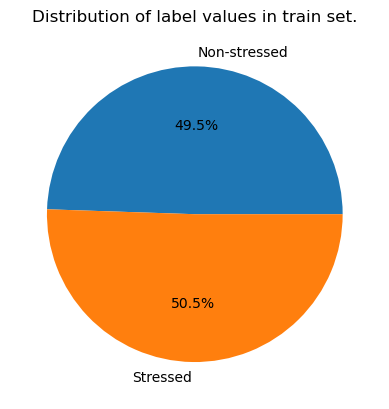

In [164]:
pie([ytr.reshape(1,-1).tolist()[0].count(i) for i in list(set(ytr.reshape(1,-1).tolist()[0]))],
    labels=['Non-stressed','Stressed'],
    autopct='%1.1f%%')
title('Distribution of label values in train set.')
show()

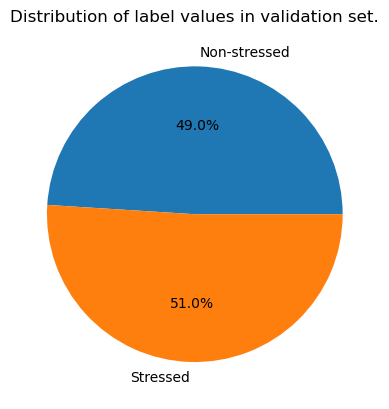

In [165]:
pie([yval.reshape(1,-1).tolist()[0].count(i) for i in list(set(yval.reshape(1,-1).tolist()[0]))],
    labels=['Non-stressed','Stressed'],
    autopct='%1.1f%%')
title('Distribution of label values in validation set.')
show()

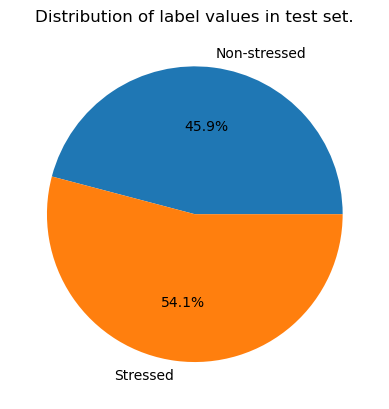

In [166]:
pie([yts.reshape(1,-1).tolist()[0].count(i) for i in list(set(yts.reshape(1,-1).tolist()[0]))],
    labels=['Non-stressed','Stressed'],
    autopct='%1.1f%%')
title('Distribution of label values in test set.')
show()

In [167]:
#Creating a model.

model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,2,input_length=mxlen),
                           layers.GlobalAveragePooling1D(),
                           layers.Dense(1,activation='sigmoid')])
#Compiling The model.

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [168]:
#Data train.

history = model.fit(xtr,ytr,epochs=30,validation_data=(xval,yval))

Epoch 1/30
219/219 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5280 - val_loss: 0.6924 - val_accuracy: 0.5590
Epoch 2/30
219/219 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.6130 - val_loss: 0.6915 - val_accuracy: 0.6040
Epoch 3/30
219/219 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.6709 - val_loss: 0.6905 - val_accuracy: 0.6460
Epoch 4/30
219/219 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.7149 - val_loss: 0.6894 - val_accuracy: 0.6810
Epoch 5/30
219/219 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.7380 - val_loss: 0.6882 - val_accuracy: 0.6890
Epoch 6/30
219/219 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.7554 - val_loss: 0.6870 - val_accuracy: 0.6950
Epoch 7/30
219/219 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.7701 - val_loss: 0.6856 - val_accuracy: 0.7150
Epoch 

In [169]:
#Model's evaluation on test set.

model.evaluate(xts,yts)

28/28 [==============================] - 0s 999us/step - loss: 0.6312 - accuracy: 0.7885


[0.6312273740768433, 0.7885264158248901]

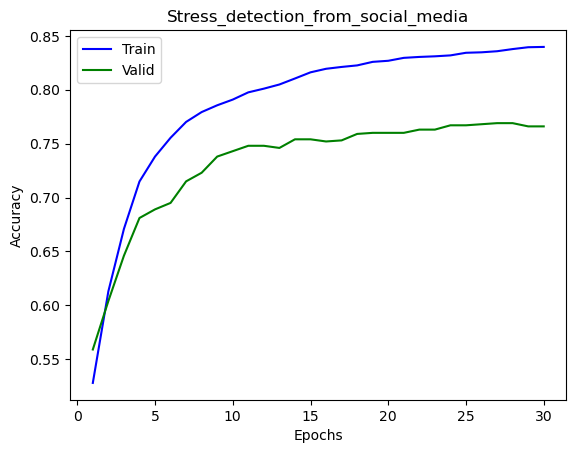

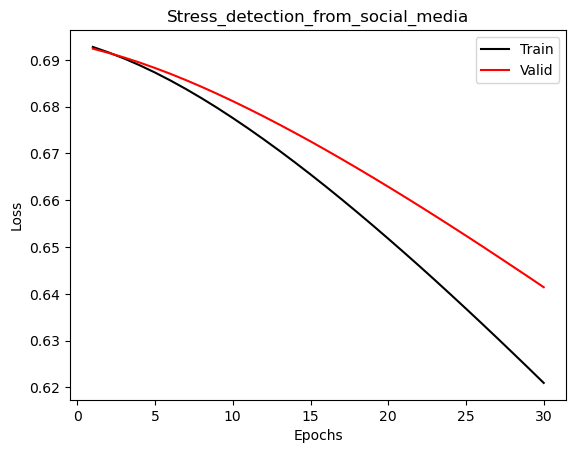

In [170]:
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['accuracy'],'blue')
plot(epoch,results['val_accuracy'],'green')
xlabel('Epochs')
ylabel('Accuracy')
title('Stress_detection_from_social_media')
legend(['Train','Valid'])
show()
plot(epoch,results['loss'],'black')
plot(epoch,results['val_loss'],'red')
xlabel('Epochs')
ylabel('Loss')
title('Stress_detection_from_social_media')
legend(['Train','Valid'])
show()

28/28 [==============================] - 0s 1ms/step


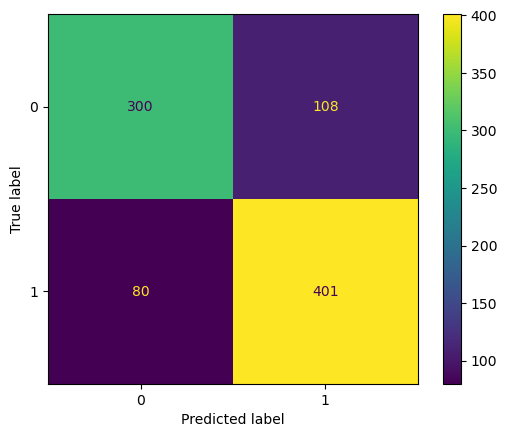

In [171]:
pred = model.predict(xts)
pred = where(pred>=0.5,1,0)
con_matrix = confusion_matrix(yts,pred)
disp = ConfusionMatrixDisplay(con_matrix)
disp.plot()